In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_func(T, p, g_i = 1, z_a = 1, m = 6.64*10e-27, I = 24.5874, H = 6.582*10e-16):
    #enter your code here
    #print((2*g_i/z_a) * (T/p) *(m*T/(2*np.pi*H**2))**(3/2) * np.exp(-I/T))
    return((2*g_i/z_a) * (T/p)*(m*T/(2*np.pi*H**2))**(3/2) * np.exp(-I/T))
    pass

def find_alpha(coef):
    return np.sqrt(coef/(coef+1))

In [3]:
g_i = 1
z_a = 1  #от основного состояния
m = 6.64*10e-27 #kg
m_e = 9.10938356*10e-28 # g
H = 6.582*10e-16 #Эв*с
T = np.linspace(3000, 50000, 100)
T_eV = T/11605 
p = np.linspace(0.1, 1, 10)
I = 24.5874


In [4]:
coef = calc_func(T_eV , 0.1 , m = m_e)

In [5]:
alpha = find_alpha(coef)

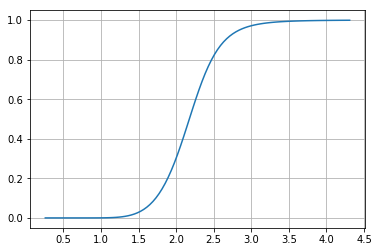

In [6]:
plt.plot(T_eV, alpha)
plt.grid()
plt.show()

In [35]:
from ipywidgets import interact
import numpy as np
from bokeh.models.annotations import Title

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [44]:
y = find_alpha(calc_func(T_eV, p = 0.1, m = m_e))

In [45]:
fig = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-0.01,1),
           background_fill_color='#efefef', x_axis_label='temp', y_axis_label='Ionization coef')
r = fig.line(T, y, color="#8888cc", line_width=2.5, alpha=1)

In [46]:
def update(f, p=0.1):
    if   f == "Helium": I = 24.5874
    elif f == "Neon": I = 21.5645
    r.data_source.data['y'] = find_alpha(calc_func(T_eV, p, m = m_e, I = I))
    push_notebook()

In [47]:
show(fig,  notebook_handle =True)
interact(update, f=["Helium", "Neon"], p=(0.1,1,0.01))

interactive(children=(Dropdown(description='f', options=('Helium', 'Neon'), value='Helium'), FloatSlider(value…

<function __main__.update(f, p=0.1)>

In [57]:
H_I = 24.5874
N_I = 21.5645
H_y = find_alpha(calc_func(T_eV, p = 0.1, m = m_e, I = H_I))
N_y = find_alpha(calc_func(T_eV, p = 0.1, m = m_e, I = N_I))

fig = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-0.01,1),
           background_fill_color='#efefef', x_axis_label='temp', y_axis_label='Ionization coef')
H = fig.line(T, H_y, color="blue", line_width=2.5, alpha=0.7, legend = 'Helium')
N = fig.line(T, N_y, color="red", line_width=2.5, alpha=0.7, legend = 'Neon')

I1 = fig.line([H_I*11605/10 for i in range(11)], [i/10 for i in range(0,11)], color = 'blue')
I2 = fig.line([N_I*11605/10 for i in range(11)], [i/10 for i in range(0,11)], color = "red")

def update(p=0.1):
    H.data_source.data['y'] = find_alpha(calc_func(T_eV, p, m = m_e, I = H_I))
    N.data_source.data['y'] = find_alpha(calc_func(T_eV, p, m = m_e, I = N_I))
    push_notebook()
    
show(fig,  notebook_handle =True)
interact(update, p=(0.1,1,0.01))

interactive(children=(FloatSlider(value=0.1, description='p', max=1.0, min=0.1, step=0.01), Output()), _dom_cl…

<function __main__.update(p=0.1)>

In [49]:
[H_I for i in range(10)]

[24.5874,
 24.5874,
 24.5874,
 24.5874,
 24.5874,
 24.5874,
 24.5874,
 24.5874,
 24.5874,
 24.5874]